# DSCI 100 Project Planning Stage
## Section 008 | Group 23
## Chris Lee

In [13]:
library(tidyverse)
library(repr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Background Information

This investigation analyzes a dataset containing player information from Minecraft, an open-world sandbox video game. TThe purpose of this individual project planning stage is to develop a comprehensive understanding of the dataset, formulate a research question, conduct exploratory data analysis and visualization, and outline the methods and plan for addressing the proposed question. 

The dataset used in this project originates from a real-world research initiative conducted by the Probablisitic Learning and AI (PLAI) Group in the Department of Computer Science at the University of British Columbia (UBC), led by Professor Frank Wood. The research team designed Minecraft research server to study player behaviour and interactions in a dynamic gaming environment.

### 1. Data Description

Players voluntarily join the server, and as they explore and interact within the game world, their in-game actions and session details are automatically recorded. This produces two datasets:

- **players.csv**
    - contains demographic and behavioural data for each unique player
    - **Number of observations**: 196
    - **Number of variables**: 7
    - Each row represents one player with their demographic and behavioural characteristics
- **sessions.csv**
    - Contains individual gameplay sessions linked to players
    - **Number of observations**: 1535
    - **Number of variables**: 5
    - Each row represents a single gameplay session, linked to a player via `hashedEmail` identifier

<br>

**Variable Summary**

<br>

<p style="text-align: center;"><b>players.csv<b></p>
    
| Variable      | Type | Description |
| :----------- | :----------- | :------- |
| `experience`  | Categorical    | Player's Minecraft experience level (e.g. Beginner, Regular, Amateur, Pro, Veteran) |
| `subscribe`   | Boolean        | Inidicates whether the player subscribed to the game-related newsletter |
| `hashedEmail` | String         | Encrypted player identifier used to link player data across datasets |
| `played_hours`| Numeric        | Total number of hours the player has spent on the server |
| `name`        | String         | Player's chosen name |
| `gender`      | String         | Gender of the player |
| `Age`         | Integer        | Player's age in years |

<br>

<p style="text-align: center;"><b>sessions.csv<b></p>
    
| Variable             | Type | Description |
| :-----------         | :-----------  | :------- |
| `hasedEmail`         | String        | Encrypted player identifier used to link with `players.csv` |
| `start_time`         | String        | Recorded start time of the session (DD/MM/YYYY HH:MM) |
| `hashedEmail`        | String        | Recorded end time of the session (DD/MM/YYYY HH:MM) |
| `orginal_start_time` | Numeric       | Unix timestamp version of session start time |
| `orginal_end_time`   | Numeric       | Unix timestamp version of session end time |


<br>

**Summary Statistics**

<br>

<p style="text-align: center;"><b>players.csv<b></p>

| Variable        | Mean |
| :-----------    | :-------  |
| `Age`           | 21.14    |
| `played_hours`  | 5.85      |


#### Potential Issues and Data Limitations

**Observable data issues**
- Some variables, such as `gender` and `experience`, are categorical and cannot be used directly in distance-based prediction models like K-Nearest Neighbors (KNN). These would require proper encoding or transformation before modeling. Incorrect encoding or scaling could distort distance calculations and reduce model accuracy.
- The variable `played_hours` contains a wide range of values, including potential outliers which may affect analysis and model performace
- The dataset does not specify the units or source of some categorical variables such as how experience levels were determined

**Unobservable or potential issues**
- The dataset may suffer from sampling bias, as players who voluntarily join a research server could differ in motivation, engagement, or demographics from the general Minecraft player base
- Player ages are self-reported and may not be entirely reliable, introducing measurement error

## 2. Questions

Broad Question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

### Specific Question: Can a player's total playtime predict newsletter subscription status in the players dataset?

The `players.csv` dataset contains variables that capture both demographic and behavioural characteristics of each player. Among these, the variable `played_hours` measures total engagement on the Minecraft server, while `subscribe` indicates whether a player joined the game-related newsletter. Since both are player-level variables, the data directly support predicting subscription likelihood based on total playtime.

Before modeling, the data will require minimal wrangling:
- The relevant columns, `played_hours` and `subscribe`, will be selected from players.csv.
- Missing values, if any, will be checked and removed.
- `subscribe` will be converted to a factor to ensure it is treated as a categorical variable.
- `played_hours` will be scaled or centered so that distance calculations are not affected by numerical magnitude differences.

## 3. Exploratory Data Analysis and Visualization

In [15]:
players <- read.csv("players.csv")
sessions <- read.csv("sessions.csv")

glimpse(players)
glimpse(sessions)

Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <int> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…
Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+

In [31]:
age_mean <- players |>
    summarize(mean_age = mean(Age, na.rm = TRUE)) |>
    round(2) |>
    pull()

played_hours_mean <- players |>
    summarize(mean_played_hours = mean(played_hours, na.rm = TRUE)) |>
    round(2) |>
    pull()

age_mean
played_hours_mean

[1] 21.14

[1] 5.85

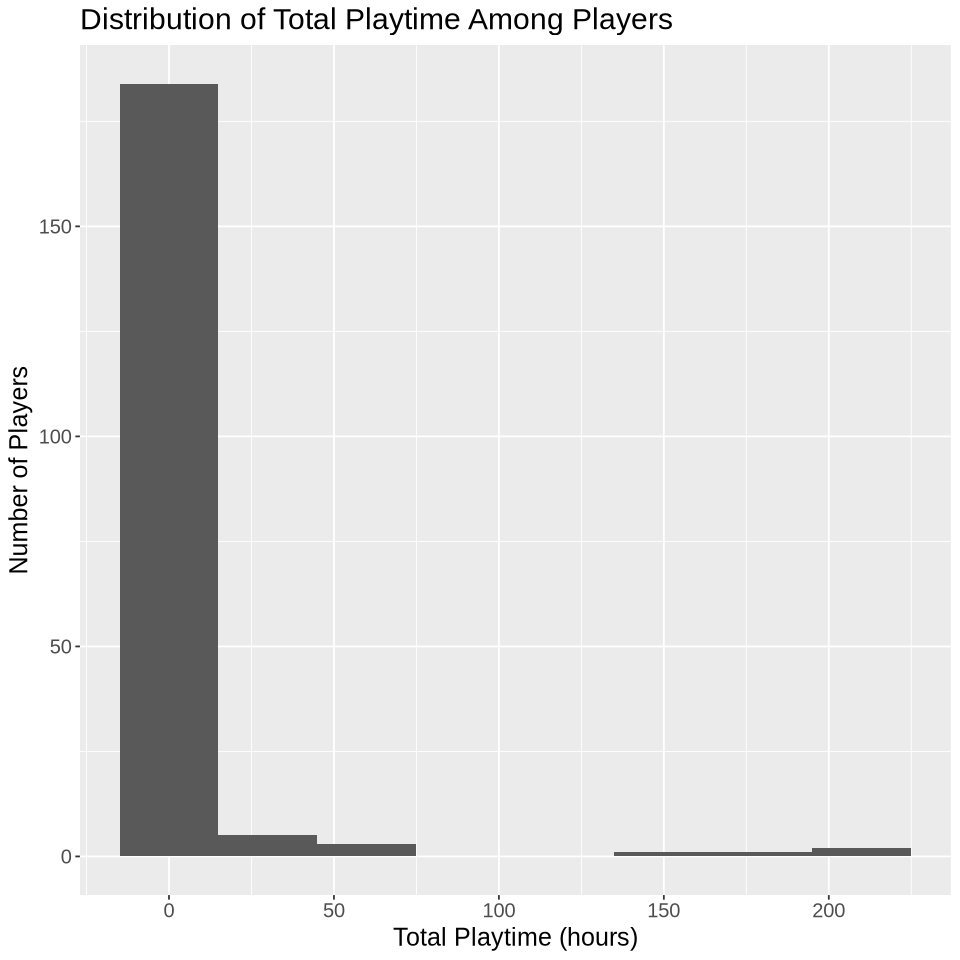

In [48]:
options(repr.plot.width = 8, repr.plot.height = 8)

played_hours_histogram <- players |>
    ggplot(aes(x = played_hours)) +
    geom_histogram(binwidth = 30) +
    labs(
        title = "Distribution of Total Playtime Among Players",
        x = "Total Playtime (hours)",
        y = "Number of Players") +
    theme(text = element_text(size = 15))

played_hours_histogram

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


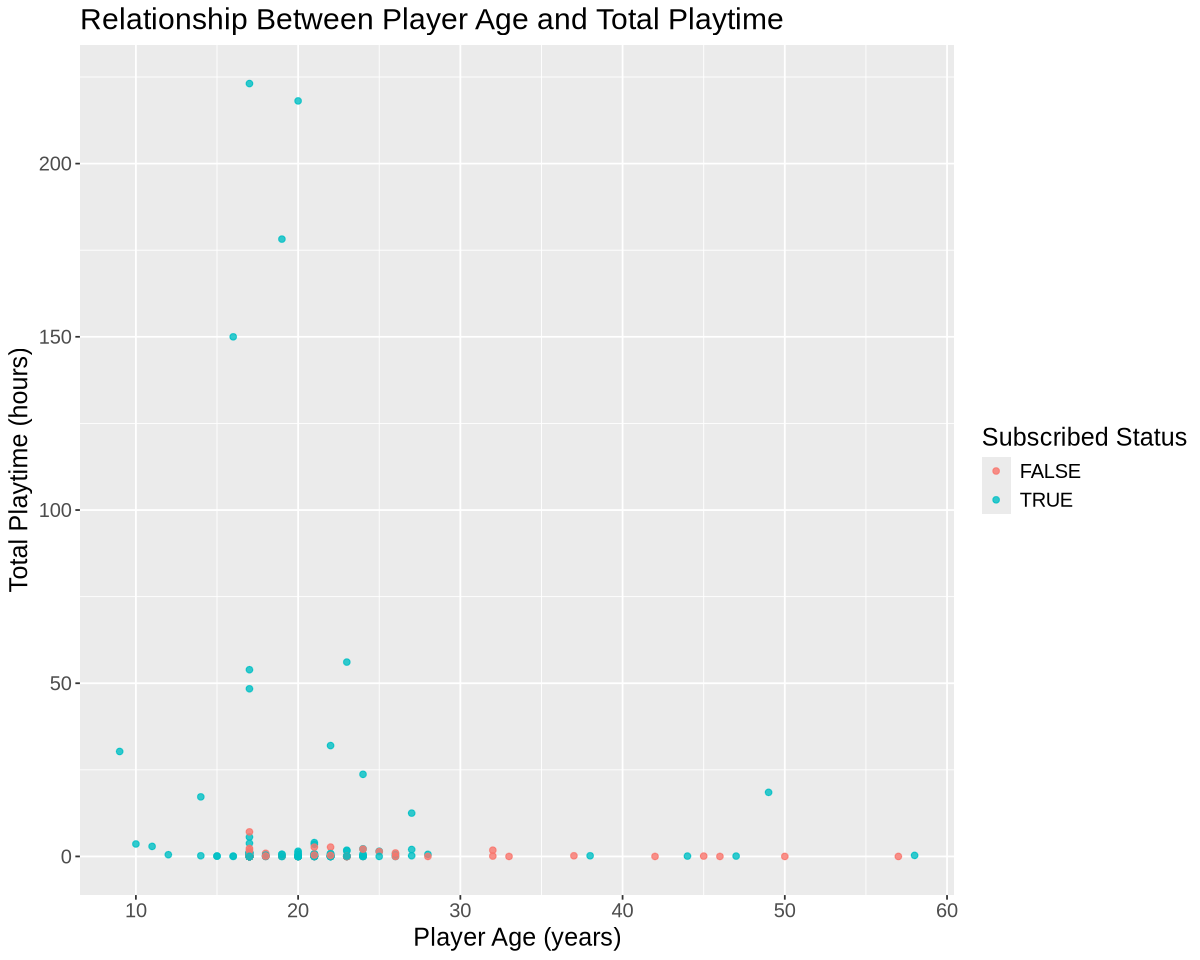

In [59]:
options(repr.plot.width = 10, repr.plot.height = 8)

players_plot <- players |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point(alpha = 0.8) +
    labs(
        title = "Relationship Between Player Age and Total Playtime",
        x = "Player Age (years)",
        y = "Total Playtime (hours)",
        color = "Subscribed Status") +
    theme(text = element_text(size = 15))

players_plot

### Insights From Visualizations

The histogram shows that most players recorded very low total playtime, while only a few players spent significantly more time on the server. This right-skewed distribution indicates that overall player engagement is uneven.

The scatter plot reveals that players who subscribed to the newsletter (shown in blue) generally have higher total playtime across multiple age groups, while non-subscribers (red) are concentrated near lower playtime values. This suggests that greater engagement, measured by total hours played, may be associated with a higher likelihood of newsletter subscription.